In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove_VI.glv3 import *

from sklearn.model_selection import KFold

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# number of folds
n_splits = 20

# import file names
files = os.listdir("data/SET3_Thirdtrial/")

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df_glove(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std, _, _ = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -72519.828, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -29296.764, Slope: 1.000
encountered 625 nans
Epoch 20, ELBO: -19933.537, Slope: 0.363
encountered 79 nans
Epoch 30, ELBO: -2205.593, Slope: 0.304
encountered 2 nans
Epoch 40, ELBO: 1325.230, Slope: 0.241
encountered 0 nans
Epoch 50, ELBO: 5274.959, Slope: 0.196
encountered 3 nans
Epoch 60, ELBO: 11713.242, Slope: 0.169
encountered 0 nans
Epoch 70, ELBO: 12684.267, Slope: 0.145
encountered 1 nans
Epoch 80, ELBO: 13031.054, Slope: 0.124
encountered 0 nans
Epoch 90, ELBO: 13272.099, Slope: 0.107
encountered 0 nans
Epoch 100, ELBO: 13537.769, Slope: 0.152
encountered 1 nans
Epoch 110, ELBO: 13712.905, Slope: 0.151
encountered 0 nans
Epoch 120, ELBO: 13924.719, Slope: 0.121
encountered 0 nans
Epoch 130, ELBO: 14095.853, Slope: 0.081
encountered 0 nans
Epoch 140, ELBO: 14181.885, Slope: 0.045
encountered 0 nans
Epoch 150, ELBO: 14195.356, Slope: 0.017
encountered 1 nans

pass 5
Epoch 260, ELBO: 14065.060, Slope: 0.001
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13544.338, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13599.274, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 13585.568, Slope: 0.002
encountered 1 nans
Epoch 30, ELBO: 13628.141, Slope: 0.002
encountered 1 nans
pass 1
Epoch 40, ELBO: 13564.797, Slope: 0.001
encountered 1 nans
pass 2
Epoch 50, ELBO: 13598.764, Slope: 0.000
encountered 1 nans
pass 3
Epoch 60, ELBO: 13630.311, Slope: 0.001
encountered 2 nans
pass 4
Epoch 70, ELBO: 13632.245, Slope: 0.001
encountered 0 nans
pass 5
Epoch 80, ELBO: 13623.074, Slope: 0.001
encountered 0 nans
Computing model evidence...

log evidence: 13607.354

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 12632.271, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 12647.910, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 12672.878, Slope: 0.002
encountered 0 nans
Epoch 30, ELBO: 12668.001, Slope: 0.00

Epoch 210, ELBO: 14379.118, Slope: 0.002
encountered 1 nans
Epoch 220, ELBO: 14350.300, Slope: 0.001
encountered 0 nans
pass 1
Epoch 230, ELBO: 14459.267, Slope: 0.001
encountered 0 nans
pass 2
Epoch 240, ELBO: 14316.969, Slope: 0.000
encountered 0 nans
pass 3
Epoch 250, ELBO: 14424.881, Slope: 0.000
encountered 2 nans
pass 4
Epoch 260, ELBO: 14399.226, Slope: 0.000
encountered 0 nans
pass 5
Epoch 270, ELBO: 14485.036, Slope: 0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8140.250, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 8304.799, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 8329.940, Slope: 0.011
encountered 2 nans
Epoch 30, ELBO: 8346.530, Slope: 0.008
encountered 1 nans
Epoch 40, ELBO: 8363.376, Slope: 0.006
encountered 1 nans
Epoch 50, ELBO: 8366.295, Slope: 0.005
encountered 1 nans
Epoch 60, ELBO: 8344.704, Slope: 0.003
encountered 0 nans
Epoch 70, ELBO: 8370.416, Slope: 0.003
encountered 0 nans
Epoch 80, ELBO: 8364.893, Slope:

Computing model evidence...

log evidence: 11265.364

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10979.062, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10959.335, Slope: 1.000
encountered 1 nans
pass 1
Epoch 20, ELBO: 10963.915, Slope: -0.001
encountered 2 nans
pass 2
Epoch 30, ELBO: 10965.447, Slope: -0.000
encountered 0 nans
pass 3
Epoch 40, ELBO: 10974.723, Slope: -0.000
encountered 1 nans
pass 4
Epoch 50, ELBO: 10960.726, Slope: -0.000
encountered 0 nans
pass 5
Epoch 60, ELBO: 10936.627, Slope: -0.000
encountered 2 nans
Computing model evidence...

log evidence: 10971.365

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10767.973, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10758.821, Slope: 1.000
encountered 0 nans
pass 1
Epoch 20, ELBO: 10752.834, Slope: -0.001
encountered 0 nans
pass 2
Epoch 30, ELBO: 10762.668, Slope: -0.000
encountered 2 nans
Epoch 40, ELBO: 10697.637, Slope: -0.001
encountered 0 nans
pass 1
Epoch 50, ELBO: 10784.

Epoch 10, ELBO: 9523.534, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9572.981, Slope: 0.008
encountered 2 nans
Epoch 30, ELBO: 9573.817, Slope: 0.005
encountered 0 nans
Epoch 40, ELBO: 9596.032, Slope: 0.004
encountered 1 nans
Epoch 50, ELBO: 9598.150, Slope: 0.003
encountered 0 nans
Epoch 60, ELBO: 9578.115, Slope: 0.002
encountered 1 nans
Epoch 70, ELBO: 9568.931, Slope: 0.002
encountered 0 nans
Epoch 80, ELBO: 9583.321, Slope: 0.001
encountered 0 nans
Epoch 90, ELBO: 9588.484, Slope: 0.001
encountered 1 nans
pass 1
Epoch 100, ELBO: 9586.241, Slope: 0.000
encountered 3 nans
pass 2
Epoch 110, ELBO: 9592.807, Slope: 0.000
encountered 0 nans
pass 3
fail 1
Epoch 120, ELBO: 9577.763, Slope: -0.000
encountered 1 nans
pass 4
fail 2
Epoch 130, ELBO: 9574.774, Slope: -0.000
encountered 0 nans
pass 5
Epoch 140, ELBO: 9593.188, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 9601.477

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11993.022, Slo

Epoch 80, ELBO: 11052.104, Slope: 0.006
encountered 1 nans
Epoch 90, ELBO: 11018.180, Slope: 0.004
encountered 2 nans
pass 1
Epoch 100, ELBO: 11041.356, Slope: 0.000
encountered 3 nans
pass 2
Epoch 110, ELBO: 11042.202, Slope: 0.000
encountered 3 nans
pass 3
Epoch 120, ELBO: 11037.222, Slope: 0.000
encountered 0 nans
pass 4
Epoch 130, ELBO: 11060.610, Slope: 0.000
encountered 1 nans
pass 5
fail 1
Epoch 140, ELBO: 11041.765, Slope: -0.000
encountered 3 nans
Computing model evidence...

log evidence: 11063.330

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10413.308, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10423.057, Slope: 1.000
encountered 2 nans
pass 1
Epoch 20, ELBO: 10423.677, Slope: 0.000
encountered 1 nans
pass 2
Epoch 30, ELBO: 10422.857, Slope: 0.000
encountered 2 nans
pass 3
Epoch 40, ELBO: 10402.816, Slope: -0.000
encountered 4 nans
pass 4
Epoch 50, ELBO: 10428.717, Slope: 0.000
encountered 2 nans
pass 5
Epoch 60, ELBO: 10412.307, Slope: -0.000
encou

pass 4
Epoch 280, ELBO: 14267.979, Slope: 0.000
encountered 0 nans
pass 5
Epoch 290, ELBO: 14241.401, Slope: 0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 12231.548, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 12315.207, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 12339.500, Slope: 0.004
encountered 0 nans
Epoch 30, ELBO: 12352.516, Slope: 0.003
encountered 1 nans
Epoch 40, ELBO: 12320.208, Slope: 0.002
encountered 1 nans
Epoch 50, ELBO: 12363.191, Slope: 0.002
encountered 0 nans
Epoch 60, ELBO: 12352.859, Slope: 0.001
encountered 0 nans
Epoch 70, ELBO: 12352.538, Slope: 0.001
encountered 1 nans
pass 1
Epoch 80, ELBO: 12362.302, Slope: 0.001
encountered 0 nans
pass 2
Epoch 90, ELBO: 12375.450, Slope: 0.001
encountered 0 nans
pass 3
Epoch 100, ELBO: 12360.937, Slope: 0.000
encountered 0 nans
pass 4
Epoch 110, ELBO: 12361.096, Slope: 0.000
encountered 0 nans
pass 5
Epoch 120, ELBO: 12374.363, Slope: 0.000
encountered 0 nans
Computing mo

pass 2
Epoch 40, ELBO: 14620.811, Slope: 0.000
encountered 0 nans
pass 3
Epoch 50, ELBO: 14636.827, Slope: 0.000
encountered 1 nans
pass 4
Epoch 60, ELBO: 14637.791, Slope: 0.000
encountered 0 nans
pass 5
Epoch 70, ELBO: 14635.237, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 14603.699

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11392.469, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11483.073, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 11486.273, Slope: 0.004
encountered 1 nans
Epoch 30, ELBO: 11487.543, Slope: 0.003
encountered 0 nans
Epoch 40, ELBO: 11469.775, Slope: 0.001
encountered 2 nans
Epoch 50, ELBO: 11501.876, Slope: 0.001
encountered 1 nans
pass 1
Epoch 60, ELBO: 11465.121, Slope: 0.001
encountered 0 nans
pass 2
Epoch 70, ELBO: 11495.812, Slope: 0.001
encountered 1 nans
pass 3
Epoch 80, ELBO: 11493.069, Slope: 0.001
encountered 0 nans
pass 4
Epoch 90, ELBO: 11485.744, Slope: 0.000
encountered 2 nans
pass 5
Epoch 10

Epoch 10, ELBO: 11700.361, Slope: 1.000
encountered 0 nans
pass 1
Epoch 20, ELBO: 11713.970, Slope: 0.000
encountered 0 nans
pass 2
Epoch 30, ELBO: 11739.119, Slope: 0.001
encountered 0 nans
pass 3
Epoch 40, ELBO: 11738.441, Slope: 0.001
encountered 1 nans
pass 4
Epoch 50, ELBO: 11712.978, Slope: 0.000
encountered 2 nans
pass 5
Epoch 60, ELBO: 11707.603, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 11728.829

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8946.692, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 8982.454, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 8992.410, Slope: 0.003
encountered 0 nans
Epoch 30, ELBO: 8988.337, Slope: 0.002
encountered 0 nans
pass 1
Epoch 40, ELBO: 8963.760, Slope: 0.000
encountered 0 nans
pass 2
Epoch 50, ELBO: 9004.290, Slope: 0.001
encountered 2 nans
pass 3
Epoch 60, ELBO: 8991.215, Slope: 0.001
encountered 1 nans
pass 4
Epoch 70, ELBO: 8958.403, Slope: 0.000
encountered 2 nans
pass 5
Epoch 80,

pass 5
fail 1
Epoch 330, ELBO: 14271.542, Slope: -0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10620.542, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10759.774, Slope: 1.000
encountered 2 nans
Epoch 20, ELBO: 10784.423, Slope: 0.008
encountered 0 nans
Epoch 30, ELBO: 10791.207, Slope: 0.005
encountered 3 nans
Epoch 40, ELBO: 10788.472, Slope: 0.003
encountered 0 nans
Epoch 50, ELBO: 10805.970, Slope: 0.003
encountered 2 nans
Epoch 60, ELBO: 10799.908, Slope: 0.002
encountered 1 nans
Epoch 70, ELBO: 10806.925, Slope: 0.002
encountered 1 nans
Epoch 80, ELBO: 10803.863, Slope: 0.001
encountered 1 nans
Epoch 90, ELBO: 10812.129, Slope: 0.001
encountered 0 nans
pass 1
Epoch 100, ELBO: 10814.738, Slope: 0.000
encountered 2 nans
pass 2
Epoch 110, ELBO: 10808.186, Slope: 0.000
encountered 1 nans
pass 3
Epoch 120, ELBO: 10814.836, Slope: 0.000
encountered 5 nans
pass 4
Epoch 130, ELBO: 10814.273, Slope: 0.000
encountered 0 nans
pass 5
Epoch 140, 

pass 3
Epoch 90, ELBO: 13748.565, Slope: 0.001
encountered 0 nans
pass 4
Epoch 100, ELBO: 13739.246, Slope: 0.000
encountered 0 nans
pass 5
Epoch 110, ELBO: 13736.128, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 13742.494

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11896.015, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11939.585, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 11935.143, Slope: 0.002
encountered 1 nans
Epoch 30, ELBO: 11954.560, Slope: 0.001
encountered 0 nans
pass 1
Epoch 40, ELBO: 11947.608, Slope: 0.001
encountered 0 nans
pass 2
Epoch 50, ELBO: 11961.583, Slope: 0.001
encountered 0 nans
pass 3
Epoch 60, ELBO: 11954.925, Slope: 0.001
encountered 0 nans
pass 4
Epoch 70, ELBO: 11945.301, Slope: 0.000
encountered 0 nans
pass 5
Epoch 80, ELBO: 11946.999, Slope: 0.000
encountered 1 nans
Computing model evidence...

log evidence: 11944.488

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11704.197, S

pass 3
Epoch 260, ELBO: 14322.909, Slope: 0.001
encountered 0 nans
pass 4
Epoch 270, ELBO: 14358.321, Slope: 0.001
encountered 2 nans
pass 5
Epoch 280, ELBO: 14281.389, Slope: 0.001
encountered 1 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10694.108, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10824.241, Slope: 1.000
encountered 2 nans
Epoch 20, ELBO: 10834.339, Slope: 0.006
encountered 2 nans
Epoch 30, ELBO: 10844.507, Slope: 0.004
encountered 0 nans
Epoch 40, ELBO: 10857.520, Slope: 0.003
encountered 0 nans
Epoch 50, ELBO: 10869.606, Slope: 0.003
encountered 0 nans
Epoch 60, ELBO: 10863.958, Slope: 0.002
encountered 2 nans
Epoch 70, ELBO: 10888.260, Slope: 0.002
encountered 0 nans
Epoch 80, ELBO: 10866.202, Slope: 0.001
encountered 1 nans
Epoch 90, ELBO: 10890.309, Slope: 0.001
encountered 0 nans
pass 1
Epoch 100, ELBO: 10888.586, Slope: 0.001
encountered 1 nans
pass 2
Epoch 110, ELBO: 10843.970, Slope: 0.000
encountered 0 nans
pass 3
Epoch 120, ELBO: 10

Epoch 10, ELBO: 15015.714, Slope: 1.000
encountered 2 nans
pass 1
Epoch 20, ELBO: 15028.166, Slope: 0.000
encountered 3 nans
pass 2
Epoch 30, ELBO: 15034.395, Slope: 0.000
encountered 1 nans
pass 3
Epoch 40, ELBO: 15051.485, Slope: 0.000
encountered 3 nans
pass 4
Epoch 50, ELBO: 15049.694, Slope: 0.000
encountered 3 nans
pass 5
Epoch 60, ELBO: 15023.089, Slope: 0.000
encountered 6 nans
Computing model evidence...

log evidence: 15040.932

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13861.442, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13870.910, Slope: 1.000
encountered 9 nans
pass 1
Epoch 20, ELBO: 13851.954, Slope: -0.000
encountered 8 nans
pass 2
Epoch 30, ELBO: 13846.637, Slope: -0.000
encountered 7 nans
pass 3
Epoch 40, ELBO: 13883.732, Slope: 0.000
encountered 4 nans
pass 4
Epoch 50, ELBO: 13869.298, Slope: 0.000
encountered 5 nans
pass 5
Epoch 60, ELBO: 13874.574, Slope: 0.000
encountered 6 nans
Computing model evidence...

log evidence: 13880.204

Upda

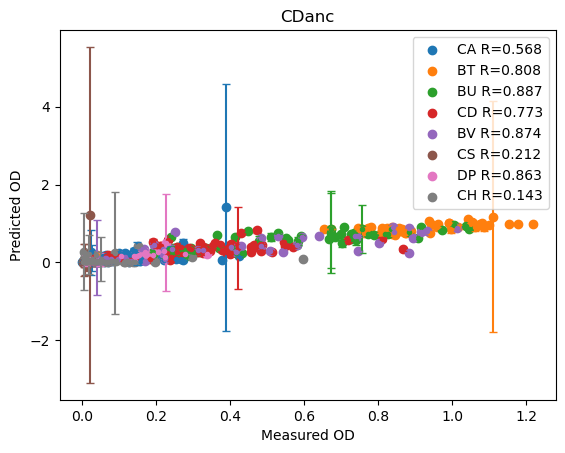

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -68365.898, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -26193.664, Slope: 1.000
encountered 486 nans
Epoch 20, ELBO: -21541.748, Slope: 0.342
encountered 231 nans
Epoch 30, ELBO: -5280.166, Slope: 0.284
encountered 35 nans
Epoch 40, ELBO: -1150.305, Slope: 0.227
encountered 3 nans
Epoch 50, ELBO: 1638.562, Slope: 0.184
encountered 4 nans
Epoch 60, ELBO: 6511.859, Slope: 0.157
encountered 2 nans
Epoch 70, ELBO: 10284.935, Slope: 0.137
encountered 1 nans
Epoch 80, ELBO: 10593.871, Slope: 0.119
encountered 0 nans
Epoch 90, ELBO: 10873.559, Slope: 0.104
encountered 1 nans
Epoch 100, ELBO: 11046.927, Slope: 0.157
encountered 0 nans
Epoch 110, ELBO: 11230.238, Slope: 0.141
encountered 0 nans
Epoch 120, ELBO: 11348.188, Slope: 0.158
encountered 0 nans
Epoch 130, ELBO: 11419.259, Slope: 0.110
encountered 1 nans
Epoch 140, ELBO: 11533.137, Slope: 0.069
encountered 0 nans
Epoch 150, ELBO: 11650.985, Slope: 0.032
encountered 0 na

Epoch 10, ELBO: 9146.171, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9049.421, Slope: -0.004
encountered 0 nans
pass 1
Epoch 30, ELBO: 9151.443, Slope: -0.000
encountered 0 nans
pass 2
Epoch 40, ELBO: 9128.271, Slope: 0.000
encountered 0 nans
pass 3
Epoch 50, ELBO: 9115.714, Slope: 0.000
encountered 0 nans
pass 4
Epoch 60, ELBO: 9039.727, Slope: -0.001
encountered 1 nans
pass 5
Epoch 70, ELBO: 9166.310, Slope: -0.000
encountered 0 nans
Computing model evidence...

log evidence: 9145.010

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -70325.734, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -42385.344, Slope: 1.000
encountered 343 nans
Epoch 20, ELBO: -18325.025, Slope: 0.370
encountered 189 nans
Epoch 30, ELBO: -8395.677, Slope: 0.298
encountered 28 nans
Epoch 40, ELBO: -2266.227, Slope: 0.242
encountered 4 nans
Epoch 50, ELBO: 2267.981, Slope: 0.200
encountered 7 nans
Epoch 60, ELBO: 5860.363, Slope: 0.170
encountered 1 nans
Epoch 70, ELBO: 9145.158, Slope: 0.1

Epoch 160, ELBO: 11543.838, Slope: 0.010
encountered 0 nans
Epoch 170, ELBO: 11619.923, Slope: 0.008
encountered 0 nans
Epoch 180, ELBO: 11661.839, Slope: 0.007
encountered 0 nans
Epoch 190, ELBO: 11622.724, Slope: 0.006
encountered 1 nans
Epoch 200, ELBO: 11734.876, Slope: 0.005
encountered 1 nans
Epoch 210, ELBO: 11727.078, Slope: 0.004
encountered 0 nans
Epoch 220, ELBO: 11716.027, Slope: 0.003
encountered 0 nans
Epoch 230, ELBO: 11727.717, Slope: 0.003
encountered 0 nans
Epoch 240, ELBO: 11741.776, Slope: 0.002
encountered 2 nans
Epoch 250, ELBO: 11772.093, Slope: 0.002
encountered 0 nans
Epoch 260, ELBO: 11786.909, Slope: 0.001
encountered 1 nans
Epoch 270, ELBO: 11766.284, Slope: 0.001
encountered 1 nans
Epoch 280, ELBO: 11785.142, Slope: 0.001
encountered 0 nans
pass 1
Epoch 290, ELBO: 11769.686, Slope: 0.001
encountered 1 nans
pass 2
Epoch 300, ELBO: 11734.216, Slope: 0.000
encountered 0 nans
pass 3
Epoch 310, ELBO: 11751.174, Slope: 0.000
encountered 0 nans
pass 4
Epoch 320, E

pass 1
Epoch 20, ELBO: 7153.612, Slope: 0.000
encountered 0 nans
pass 2
Epoch 30, ELBO: 7171.233, Slope: 0.000
encountered 2 nans
pass 3
Epoch 40, ELBO: 7180.535, Slope: 0.001
encountered 4 nans
pass 4
Epoch 50, ELBO: 7195.219, Slope: 0.001
encountered 4 nans
pass 5
Epoch 60, ELBO: 7191.558, Slope: 0.001
encountered 9 nans
Computing model evidence...

log evidence: 7187.998

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -70757.211, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -24308.600, Slope: 1.000
encountered 560 nans
Epoch 20, ELBO: -13604.607, Slope: 0.404
encountered 234 nans
Epoch 30, ELBO: -6106.353, Slope: 0.289
encountered 30 nans
Epoch 40, ELBO: -1128.109, Slope: 0.223
encountered 9 nans
Epoch 50, ELBO: 299.852, Slope: 0.175
encountered 3 nans
Epoch 60, ELBO: 5753.118, Slope: 0.147
encountered 1 nans
Epoch 70, ELBO: 10131.920, Slope: 0.128
encountered 1 nans
Epoch 80, ELBO: 10426.340, Slope: 0.111
encountered 2 nans
Epoch 90, ELBO: 10666.142, Slope: 0.097

Updating posterior...
Epoch 0, ELBO: 9358.919, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9420.718, Slope: 1.000
encountered 2 nans
Epoch 20, ELBO: 9430.910, Slope: 0.004
encountered 1 nans
Epoch 30, ELBO: 9425.888, Slope: 0.002
encountered 0 nans
Epoch 40, ELBO: 9428.109, Slope: 0.002
encountered 0 nans
pass 1
Epoch 50, ELBO: 9375.135, Slope: 0.000
encountered 0 nans
pass 2
Epoch 60, ELBO: 9430.871, Slope: 0.000
encountered 1 nans
pass 3
Epoch 70, ELBO: 9368.890, Slope: -0.000
encountered 0 nans
pass 4
Epoch 80, ELBO: 9426.041, Slope: 0.000
encountered 1 nans
pass 5
Epoch 90, ELBO: 9429.141, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 9427.243

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 6819.350, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 6832.793, Slope: 1.000
encountered 2 nans
pass 1
Epoch 20, ELBO: 6820.229, Slope: 0.000
encountered 1 nans
pass 2
Epoch 30, ELBO: 6832.938, Slope: 0.000
encountered 2 nans
pass 3
Epoch 40

Computing model evidence...

log evidence: 7865.446

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -69902.031, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -22876.596, Slope: 1.000
encountered 481 nans
Epoch 20, ELBO: -14664.240, Slope: 0.395
encountered 209 nans
Epoch 30, ELBO: -5456.556, Slope: 0.288
encountered 59 nans
Epoch 40, ELBO: -863.462, Slope: 0.222
encountered 32 nans
Epoch 50, ELBO: 3813.853, Slope: 0.181
encountered 3 nans
Epoch 60, ELBO: 9271.578, Slope: 0.156
encountered 1 nans
Epoch 70, ELBO: 10474.965, Slope: 0.133
encountered 0 nans
Epoch 80, ELBO: 10654.967, Slope: 0.114
encountered 2 nans
Epoch 90, ELBO: 10963.418, Slope: 0.099
encountered 3 nans
Epoch 100, ELBO: 11095.552, Slope: 0.160
encountered 0 nans
Epoch 110, ELBO: 11183.979, Slope: 0.177
encountered 1 nans
Epoch 120, ELBO: 11338.438, Slope: 0.148
encountered 1 nans
Epoch 130, ELBO: 11453.257, Slope: 0.093
encountered 0 nans
Epoch 140, ELBO: 11529.812, Slope: 0.048
encountered 0 nans
Epoc

pass 3
Epoch 40, ELBO: 9320.333, Slope: 0.000
encountered 2 nans
pass 4
Epoch 50, ELBO: 9334.086, Slope: 0.000
encountered 3 nans
pass 5
Epoch 60, ELBO: 9318.522, Slope: 0.000
encountered 4 nans
Computing model evidence...

log evidence: 9335.667

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 9004.525, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9017.460, Slope: 1.000
encountered 1 nans
pass 1
Epoch 20, ELBO: 8991.381, Slope: -0.001
encountered 6 nans
pass 2
Epoch 30, ELBO: 9005.306, Slope: -0.000
encountered 5 nans
pass 3
Epoch 40, ELBO: 9015.015, Slope: 0.000
encountered 9 nans
pass 4
Epoch 50, ELBO: 9007.534, Slope: 0.000
encountered 5 nans
pass 5
Epoch 60, ELBO: 9021.208, Slope: 0.000
encountered 6 nans
Computing model evidence...

log evidence: 9016.819

Number of parameters: 240
Updating posterior...
Epoch 0, ELBO: -70386.516, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -30272.057, Slope: 1.000
encountered 495 nans
Epoch 20, ELBO: -19815.432, Slope: 0.3

Epoch 10, ELBO: 11616.016, Slope: 1.000
encountered 1 nans
Epoch 20, ELBO: 11613.699, Slope: 0.002
encountered 0 nans
Epoch 30, ELBO: 11616.659, Slope: 0.001
encountered 0 nans
Epoch 40, ELBO: 11645.090, Slope: 0.001
encountered 0 nans
pass 1
Epoch 50, ELBO: 11633.256, Slope: 0.001
encountered 0 nans
pass 2
Epoch 60, ELBO: 11606.712, Slope: 0.001
encountered 1 nans
pass 3
Epoch 70, ELBO: 11640.107, Slope: 0.001
encountered 0 nans
pass 4
Epoch 80, ELBO: 11618.915, Slope: 0.000
encountered 0 nans
pass 5
Epoch 90, ELBO: 11636.294, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 11606.913

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 10024.365, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 10033.830, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 10064.204, Slope: 0.002
encountered 1 nans
Epoch 30, ELBO: 10057.109, Slope: 0.001
encountered 1 nans
Epoch 40, ELBO: 10065.208, Slope: 0.001
encountered 0 nans
pass 1
Epoch 50, ELBO: 10068.056, Sl

pass 4
Epoch 320, ELBO: 11905.071, Slope: 0.001
encountered 1 nans
pass 5
Epoch 330, ELBO: 11899.040, Slope: 0.001
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 9533.833, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9613.678, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9607.386, Slope: 0.004
encountered 0 nans
Epoch 30, ELBO: 9636.944, Slope: 0.003
encountered 1 nans
Epoch 40, ELBO: 9639.144, Slope: 0.002
encountered 1 nans
Epoch 50, ELBO: 9644.213, Slope: 0.002
encountered 1 nans
pass 1
Epoch 60, ELBO: 9576.801, Slope: 0.001
encountered 2 nans
pass 2
Epoch 70, ELBO: 9650.297, Slope: 0.001
encountered 0 nans
pass 3
Epoch 80, ELBO: 9583.254, Slope: 0.000
encountered 0 nans
pass 4
Epoch 90, ELBO: 9616.226, Slope: 0.000
encountered 1 nans
pass 5
Epoch 100, ELBO: 9657.529, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 9650.081

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 7379.485, Slope: 1.000
en

Epoch 250, ELBO: 11866.504, Slope: 0.003
encountered 0 nans
Epoch 260, ELBO: 11894.146, Slope: 0.002
encountered 0 nans
Epoch 270, ELBO: 11892.939, Slope: 0.002
encountered 1 nans
Epoch 280, ELBO: 11859.291, Slope: 0.001
encountered 0 nans
Epoch 290, ELBO: 11886.418, Slope: 0.001
encountered 0 nans
Epoch 300, ELBO: 11893.661, Slope: 0.001
encountered 0 nans
pass 1
Epoch 310, ELBO: 11919.554, Slope: 0.001
encountered 0 nans
pass 2
Epoch 320, ELBO: 11912.562, Slope: 0.001
encountered 0 nans
pass 3
Epoch 330, ELBO: 11859.649, Slope: 0.000
encountered 0 nans
pass 4
Epoch 340, ELBO: 11901.680, Slope: 0.000
encountered 0 nans
pass 5
Epoch 350, ELBO: 11931.601, Slope: 0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11703.158, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11715.338, Slope: 1.000
encountered 1 nans
Epoch 20, ELBO: 11737.229, Slope: 0.001
encountered 0 nans
Epoch 30, ELBO: 11776.091, Slope: 0.002
encountered 0 nans
Epoch 40, ELBO: 1177

Epoch 50, ELBO: 6663.960, Slope: 0.001
encountered 19 nans
pass 1
Epoch 60, ELBO: 6658.458, Slope: 0.001
encountered 20 nans
pass 2
Epoch 70, ELBO: 6659.487, Slope: 0.001
encountered 14 nans
pass 3
Epoch 80, ELBO: 6660.684, Slope: 0.001
encountered 27 nans
pass 4
Epoch 90, ELBO: 6651.906, Slope: 0.000
encountered 30 nans
pass 5
Epoch 100, ELBO: 6672.900, Slope: 0.000
encountered 23 nans
Computing model evidence...

log evidence: 6658.516

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 9414.688, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9471.853, Slope: 1.000
encountered 34 nans
Epoch 20, ELBO: 9458.950, Slope: 0.002
encountered 39 nans
Epoch 30, ELBO: 9467.378, Slope: 0.002
encountered 44 nans
pass 1
Epoch 40, ELBO: 9426.321, Slope: 0.000
encountered 44 nans
pass 2
Epoch 50, ELBO: 9436.479, Slope: -0.000
encountered 46 nans
pass 3
Epoch 60, ELBO: 9450.639, Slope: 0.000
encountered 47 nans
pass 4
Epoch 70, ELBO: 9471.201, Slope: 0.000
encountered 51 nans
pass 5
E

pass 4
fail 1
Epoch 130, ELBO: 9682.012, Slope: -0.000
encountered 0 nans
pass 5
Epoch 140, ELBO: 9710.538, Slope: -0.000
encountered 1 nans
Computing model evidence...

log evidence: 9725.771

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8976.896, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9195.602, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9189.322, Slope: 0.012
encountered 0 nans
Epoch 30, ELBO: 9186.187, Slope: 0.007
encountered 1 nans
Epoch 40, ELBO: 9219.476, Slope: 0.005
encountered 0 nans
Epoch 50, ELBO: 9181.263, Slope: 0.003
encountered 0 nans
Epoch 60, ELBO: 9208.920, Slope: 0.003
encountered 0 nans
Epoch 70, ELBO: 9223.528, Slope: 0.002
encountered 2 nans
Epoch 80, ELBO: 9210.610, Slope: 0.002
encountered 0 nans
Epoch 90, ELBO: 9181.139, Slope: 0.001
encountered 1 nans
pass 1
Epoch 100, ELBO: 9197.751, Slope: 0.000
encountered 2 nans
pass 2
Epoch 110, ELBO: 9212.187, Slope: 0.000
encountered 1 nans
pass 3
fail 1
Epoch 120, ELBO: 9190.143, Slop

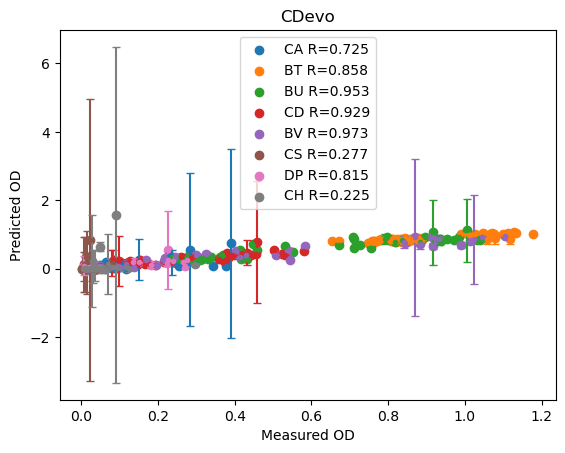

In [4]:
# run kfold for each file 
for file in files:
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_dfs = []
    dfs = []
    treatments = []
    for treatment, df_i in df.groupby("Treatments"):
        # hyphen is only in community conditions
        if "-" in treatment:
            dfs.append(df_i)
            # save treatment name without the replicate identifier 
            treatments.append([treatment.split("_")[0]]*df_i.shape[0])
        else:
            mono_dfs.append(df_i)
    treatments = np.concatenate(treatments)
    unique_treatments = np.unique(treatments)
    mono_df = pd.concat(mono_dfs)
    df = pd.concat(dfs)

    # init kfold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(unique_treatments):
        
        # get train df
        train_inds = np.in1d(treatments, unique_treatments[train_index])
        train_df = df.iloc[train_inds].copy()
        train_df = pd.concat((mono_df, train_df))
        
        # average replicates in the test_df
        test_df = []
        for test_treatment in unique_treatments[test_index]:
            # pull dataframe with all replicates of same test treatment 
            treatment_inds = np.in1d(treatments, test_treatment)
            df_treatment = df.iloc[treatment_inds].copy()
            
            # get set of unique measurement times
            treatment_times = np.unique(df_treatment.Time.values)
            
            # init dataframe to store averaged values
            avg_df = pd.DataFrame()
            avg_df['Treatments'] = [test_treatment]*len(treatment_times)
            avg_df['Time'] = treatment_times

            avg_data = np.zeros([len(treatment_times), len(species)])
            for i, time in enumerate(treatment_times):
                avg_data[i] = df_treatment.iloc[df_treatment.Time.values==time][species].mean()
            avg_df[species] = avg_data
            test_df.append(avg_df)
        
        # combine averaged dataframes for test dataframe
        test_df = pd.concat(test_df)

        # init model 
        model = gLV(dataframe=train_df, 
                    species=species,
                    nu2=.001, sigma2=.01)

        # init params
        model.init_params(sample=False)
        print(f"Number of parameters: {model.n_params}")

        # fit to data 
        model.fit_posterior_EM()

        # predict test data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_{n_splits}_fold_3_VI.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_{n_splits}_fold_3_VI.pdf", dpi=300)
    plt.show()